In [27]:
import numpy as np
import pandas as pd

#Nhập dữ liệu vào dataset
dataset = pd.read_csv('genres_v2.csv')
dataset.head()

C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3417: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


Chọn tempo và beats là feature. Vì trong những bài hát tương tự nhau thì nhịp beat và tempo của nó sẽ tương tự nhau

In [28]:
#X là tempo và beats

X = dataset.iloc[:,[1,9]].values
X

array([[0.814 , 0.389 ],
       [0.493 , 0.124 ],
       [0.893 , 0.0391],
       ...,
       [0.821 , 0.124 ],
       [0.921 , 0.488 ],
       [0.945 , 0.134 ]])

# Chọn k cho mô hình
## Phương pháp 1: Dựa vào biểu đồ elbow
Với biểu đồ khuỷu tay như vậy, ta nhận thấy được tại vị trí k = 3 thì độ biến dạng giữa các k về sau không nhiều, không đáng kể. Nếu ta chọn k nhỏ hơn thì nó tốt cho độ biến dạng, nhưng mô hình của ta sẽ có nhiều tâm gần và sát nhau, điều đó làm dữ liệu của ta bị nhiễu và sai sót nhiều. Vì vậy chọn k = 3 là hợp lý nhất

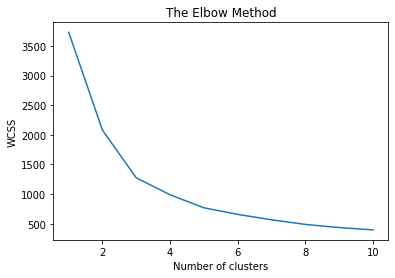

In [29]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

#Vẽ biểu đồ khuỷu tay
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    #thêm các giá trị biến dạng của mô hình với mỗi k từ 1-10 vào list wcss
    wcss.append(kmeans.inertia_)

#Vẽ đồ thị elbow    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Phương pháp 2: Dùng thư viện Kneed
Ở đây với thư viện Kneed thì ta cũng chọn ra được từ mô hình là k=3, vì vậy ta chọn k = 3 để bắt đầu huấn luyện mô hình và phân cụm

In [30]:
from kneed import KneeLocator

kl = KneeLocator( range(1, 11), wcss, curve="convex", direction="decreasing")
kl.elbow

3

In [41]:
#Huấn luyện mô hình K-Means với số tâm cụm tối ưu k = 5
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
#Dự đoán với X
y_kmeans = kmeans.fit_predict(X)

In [42]:
X
# y_kmeans

array([[0.814 , 0.389 ],
       [0.493 , 0.124 ],
       [0.893 , 0.0391],
       ...,
       [0.821 , 0.124 ],
       [0.921 , 0.488 ],
       [0.945 , 0.134 ]])

# Vẽ đồ thị phân cụm
Dựa vào mô hình thì việc phân cụm được chia ra 3 cụm rất rõ ràng, nên đây là 1 mô hình tốt

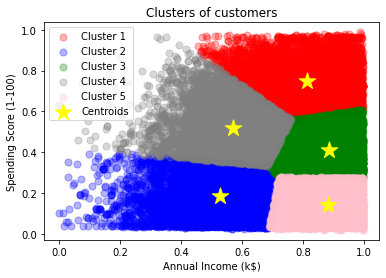

In [43]:
#Vẽ các điểm
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red',alpha=0.3, label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue',alpha=0.3, label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green',alpha=0.3, label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'Gray',alpha=0.3, label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'pink',alpha=0.3, label = 'Cluster 5')
#Vẽ tâm
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow',marker='*', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [44]:
y_kmeans = kmeans.fit_predict([[0.814 , 0.389 ],
       [0.493 , 0.124 ],
       [0.893 , 0.0391],
       [0.493 , 0.124 ],
       [0.893 , 0.0391]])
y_kmeans

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


array([2, 0, 1, 0, 1])